# Evaluation of data


In [12]:
## Library importing
import numpy as np
import pandas as pd
import os
import dataclasses
from dataclasses import dataclass
import matplotlib.pyplot as plt

In [13]:

from typing import Optional



@dataclass
class FileHandler:
    name                   : Optional[str]                 = None
    AspirationArea         : Optional[tuple[pd.DataFrame]] = None
    AverageLearningComp    : Optional[tuple[pd.DataFrame]] = None
    AverageLearningCoop    : Optional[tuple[pd.DataFrame]] = None
    CoopFrequency          : Optional[tuple[pd.DataFrame]] = None
    Death                  : Optional[tuple[pd.DataFrame]] = None
    Escaped                : Optional[tuple[pd.DataFrame]] = None
    RatioDistance          : Optional[tuple[pd.DataFrame]] = None
    RewardAspiration       : Optional[tuple[pd.DataFrame]] = None
    StdLearningComp        : Optional[tuple[pd.DataFrame]] = None
    StdLearningCoop        : Optional[tuple[pd.DataFrame]] = None
    StdLearningCoop        : Optional[tuple[pd.DataFrame]] = None
    RewardGameDistance     : Optional[tuple[pd.DataFrame]] = None


In [14]:
# Misc functions

def list_dir_with_path(p : os.PathLike) -> list[os.PathLike]:
    '''
    List subdirectory, with the real path attched to it
    '''
    return [ os.path.realpath(os.path.join(p,i)) for i in os.listdir(p)]
def merge_two_frames(df1 : pd.DataFrame, df2 : pd.DataFrame, group_by: list[str], red_func : str) -> pd.DataFrame:
    """
    Merge two dataframes based on grouped keys. Reminder you need to add your own aggregation method
    For example
        Parameters:
            df1 (pd.DataFrame) : Pandas Dataframe
            df2 (pd.DataFrame) : Pandas Dataframe
            groupby (list[str]) : List of strings to group the two dataframes by
        
        Returns:
            merged_df pd.Dataframe : Merged Pandas dataframe, without an aggregated method
    """
    assert red_func in ["sum", "std", "mean"]
    concated = pd.concat([df1,df2],ignore_index=True,sort=False)
    if len(group_by) == 0:
        return concated
    concated = concated.groupby(group_by, as_index=False)
    match red_func:
        case "sum":
            return concated.sum()
        case "mean":
            return concated.mean()
        case "std":
            return concated.std(ddof=0.)    
            

In [25]:
from functools import reduce
# Get current directory and all necessary folders
cwd = os.path.realpath(os.path.dirname(os.getcwd()))
output_wd = os.path.realpath(os.path.join(
    cwd, "..",  "output"
))
output_dirs = list_dir_with_path(output_wd)
files = [FileHandler() for _ in range(len(output_dirs))]
keys =  {
    "AspirationArea" : ["Fire Area"],
    "AverageLearningComp" : ["Time"],
    "AverageLearningCoop" : ["Time"],
    "CoopFrequency" : ["Time"],
    "Death" : ["Time step"],
    "Escaped" : ["Time step"],
    "RatioDistance"      : [],
    "RewardAspiration"   : [],
    "RewardGameDistance" : [],
    "StdLearningComp"    : [],
    "StdLearningCoop"    : [],
}

def read_from_csv(x:str) -> pd.DataFrame:
    df = pd.read_csv(x)
    df = df.drop(columns=["series"])
    return df

for (fh, output_dir) in zip(files, output_dirs):
    for name in os.listdir(output_dir):
        it_avg = map(read_from_csv,list_dir_with_path(os.path.realpath(os.path.join(output_dir, name))))
        it_std  = map(read_from_csv,list_dir_with_path(os.path.realpath(os.path.join(output_dir, name))))
        red_avg = reduce(lambda x,y: merge_two_frames(x,y,keys[name],"mean"), it_avg)
        red_std = reduce(lambda x,y: merge_two_frames(x,y,keys[name],"std"), it_std)
        setattr(fh, name, (red_avg,red_std))
    fh.name = os.path.split(output_dir)[-1]

In [16]:
for f in files:
    print(f.name)

f_s_test_val_0.15_out
f_s_test_val_0.1_out
f_s_test_val_0.25_out
f_s_test_val_0.2_out
f_s_test_val_0.35_out
f_s_test_val_0.3_out
f_s_test_val_0.45_out
f_s_test_val_0.4_out
f_s_test_val_0.55_out
f_s_test_val_0.5_out
f_s_test_val_0.65_out
f_s_test_val_0.6_out
f_s_test_val_0.75_out
f_s_test_val_0.7_out
f_s_test_val_0.85_out
f_s_test_val_0.8_out
f_s_test_val_0.9_out


In [17]:

import matplotlib.colors as mcolors
colors = list(mcolors.XKCD_COLORS.keys())

## Plotting the data

Plot between all * 2
### Aspiration Area


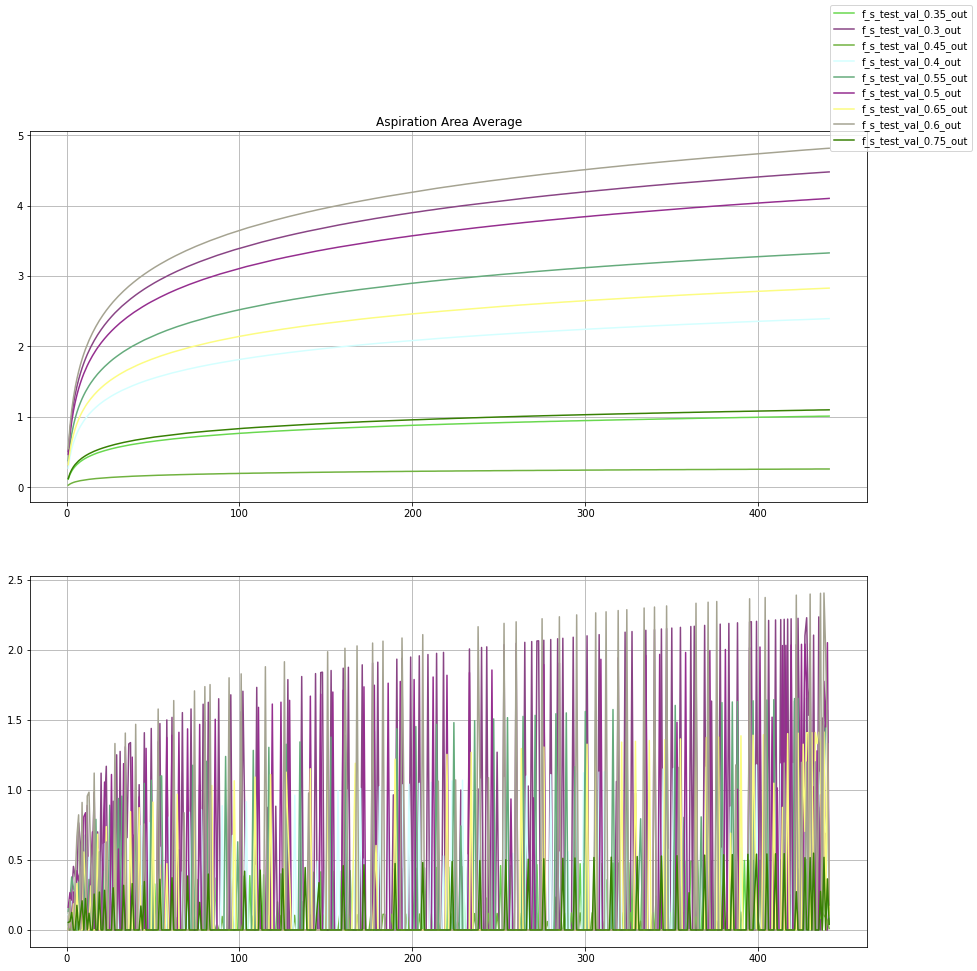

In [26]:
%matplotlib inline
fig,ax = plt.subplots(2)
fig.set_figwidth(15)
fig.set_figheight(15)

for i in range(4,len(files[4:])):
    ax[0].plot(files[i].AspirationArea[0].iloc[:,0], files[i].AspirationArea[0].iloc[:,1],color=colors[i],label=files[i].name)
    ax[1].plot(files[i].AspirationArea[1].iloc[:,0], files[i].AspirationArea[1].iloc[:,1],color=colors[i],label=files[i].name)
ax[0].set_title(f"Aspiration Area Standard Deviation")
ax[0].grid(True)
ax[0].set_title(f"Aspiration Area Average")
ax[1].grid(True)    
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles,labels, )
plt.show()

### Average learning rate competition

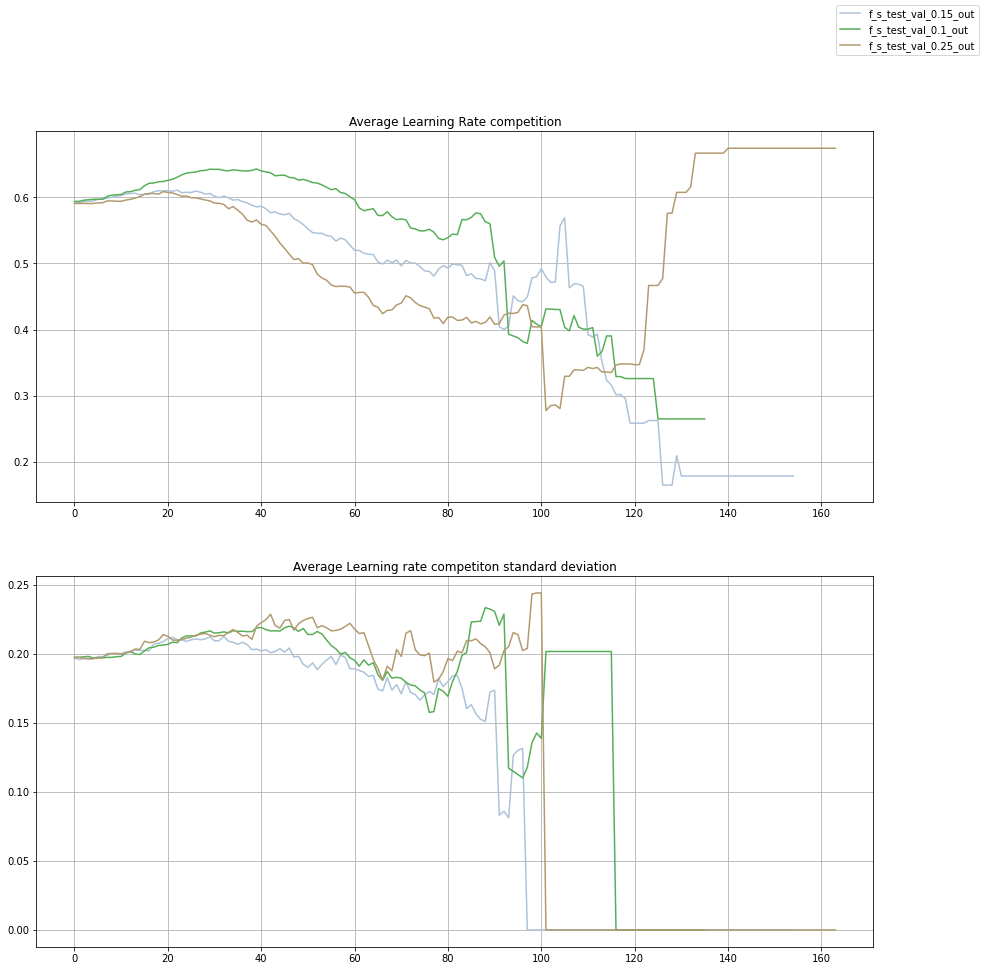

In [27]:
%matplotlib inline
import itertools


fig,ax = plt.subplots(2)
fig.set_figwidth(15)
fig.set_figheight(15)
start = 0
for i in itertools.islice(range(start,len(files[start:])), 3):
    ax[0].plot(files[i].AverageLearningComp[0].iloc[:,0], files[i].AverageLearningComp[0].iloc[:,1],color=colors[i],label=files[i].name)
    ax[1].plot(files[i].AverageLearningComp[1].iloc[:,0], files[i].AverageLearningComp[1].iloc[:,1],color=colors[i],label=files[i].name)
ax[0].set_title(f"Average Learning Rate competition")
ax[0].grid(True)
ax[1].set_title(f"Average Learning rate competiton standard deviation")
ax[1].grid(True)    
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles,labels)
plt.show()

### Average learning rate cooperation

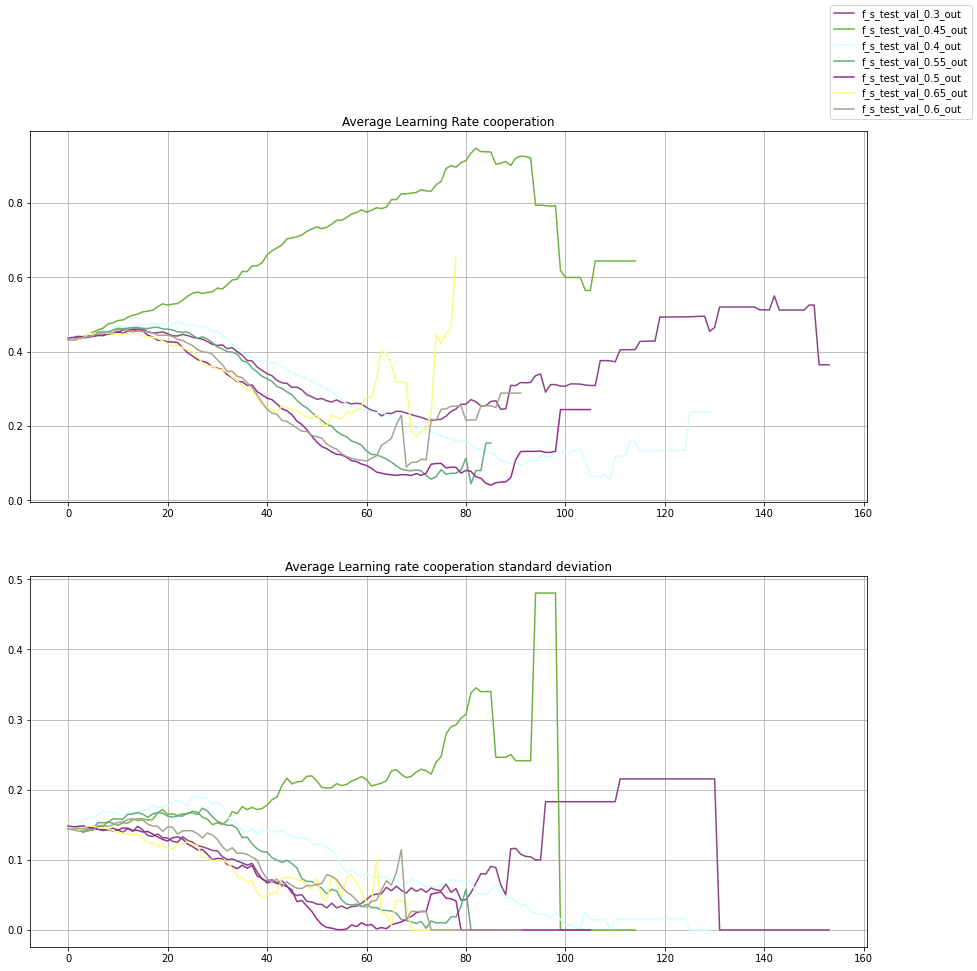

In [35]:
%matplotlib inline
import itertools


fig,ax = plt.subplots(2)
fig.set_figwidth(15)
fig.set_figheight(15)
start = 5
for i in itertools.islice(range(start,len(files[start:])), 12):
    ax[0].plot(files[i].AverageLearningCoop[0].iloc[:,0], files[i].AverageLearningCoop[0].iloc[:,1],color=colors[i],label=files[i].name)
    ax[1].plot(files[i].AverageLearningCoop[1].iloc[:,0], files[i].AverageLearningCoop[1].iloc[:,1],color=colors[i],label=files[i].name)
ax[0].set_title(f"Average Learning Rate cooperation")
ax[0].grid(True)
ax[1].set_title(f"Average Learning rate cooperation standard deviation")
ax[1].grid(True)    
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles,labels)
plt.show()

### Standard deviation of learning competition

### Standard deviation of learning cooperation

### Cooperation Frequency

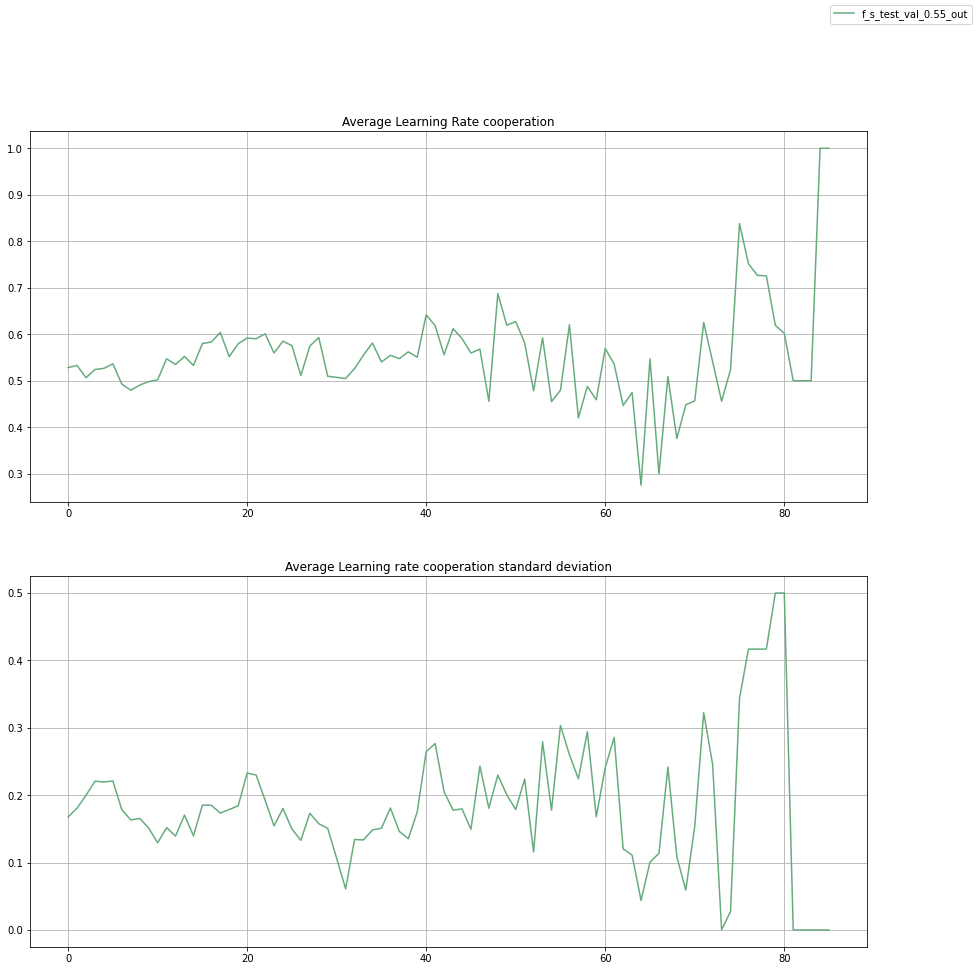

In [32]:
%matplotlib inline
import itertools


fig,ax = plt.subplots(2)
fig.set_figwidth(15)
fig.set_figheight(15)
start = 8
for i in itertools.islice(range(start,len(files[start:])), 3):
    ax[0].plot(files[i].CoopFrequency[0].iloc[:,0], files[i].CoopFrequency[0].iloc[:,1],color=colors[i],label=files[i].name)
    ax[1].plot(files[i].CoopFrequency[1].iloc[:,0], files[i].CoopFrequency[1].iloc[:,1],color=colors[i],label=files[i].name)
ax[0].set_title(f"Average Learning Rate cooperation")
ax[0].grid(True)
ax[1].set_title(f"Average Learning rate cooperation standard deviation")
ax[1].grid(True)    
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles,labels)
plt.show()

### Deaths over time

### Escapees over time

### Ratio Distance

### Reward over Aspiration